# Ejercicio 5

## Thinning

El adelgazamiento o thinning es una operación morfológica que se utiliza para eliminar píxeles de primer plano seleccionados de imágenes binarias. El adelgazamiento normalmente solo se aplica a imágenes binarias y produce otra imagen binaria como salida, se usa comúnmente para ordenar la salida de los detectores de bordes reduciendo todas las líneas al grosor de un solo píxel.
Puede usarse para varias aplicaciones, pero es particularmente útil para esqueletizar.

El adelgazamiento se define como:

$$thin(I,J) = I - hitAndMiss(I,J)$$

Donde la sustracción se debe entender como una sustracción lógica definida por: 

$$X-Y = X \cap \overline{Y}$$

donde:
<ul>
  <li>I es la imagen </li>
  <li>J es el elemento estructural.</li>
</ul>

A continuación se muestra un ejemplo de esto implementado con los siguientes elementos estructurales:

<div align="center">
  <img src='Theory-Images/elementos_estructurales_thinning.png' alt="elementos estructurales" width="300">
      <h5 align="center">
          Figura 1: En cada iteración la imágen primero es "adelgazada"  por el elemento estructural de la izquierda, luego por el derecho y luego por los restantes 6 componentes estructurales que surgen de rotar cada componente estructural 90°
      </h5>
    <br>
</div>

<div align="center">
    <img src='Theory-Images/thinning.png' alt="elementos estructurales" width="400">
      <h5 align="center">
          Figura 2: Resultados obtenidos.
      </h5>
    <br>
</div>

Se puede ver en la imágen resultante el proceso de adelgazamiento que presenta la imágen original luego del procesado.

A continuación se muestra un ejemplo de esto utilizando la librería scikit-image que provee de una funcion llamada skeletonize que realiza por dentro un procedimiento similar al de adelgazamiento.

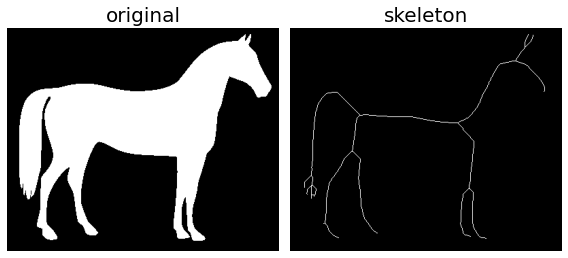

In [61]:
from skimage.morphology import skeletonize, thin
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# # Invert the horse image
image = invert(data.horse())

# perform skeletonization
thinned_image = skeletonize(image)

# Puede obtenerse el mismo resultado utilizando la función thin. To test it jus uncomment the next line.
"thinned_image = thin(image)"

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(thinned_image, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()


## Thickening

La operación denominada Thickening, o espesamiento en español, es una operación morfológica que se utiliza para hacer crecer regiones seleccionadas de píxeles del primer plano en imágenes binarias.

Se define como:

$$Thicken(I,J) = I \cup hitAndMiss(I,J)$$


donde:
<ul>
  <li>I es la imagen </li>
  <li>J es el elemento estructural.</li>
</ul>

Thickening es la operación inversa al Thinning, es decir se puede pensar al Thickenning como un Thinning del fondo de la imágen.

Ejemplo:

Mediante los componentes estructurales de la figura 3 podemos realizar un thickening de la imagen original.

<div align="center">
    <img src='Theory-Images/thickening.png' alt="elementos estructurales" width="300">
      <h5 align="center">
          Figura 3: Elementos Estructurales.
      </h5>
    <br>
</div>

De esta manera podemos a continuación en la figura 4 ver los resultados finales luego del procesamiento de la imágen original mediante thickening.

<div align="center">
    <img src='Theory-Images/thickening_results.png' alt="elementos estructurales" width="300">
      <h5 align="center">
          Figura 4: Resultados luego de aplicar Thickening.
      </h5>
    <br>
</div>


A continuación se muestra un ejemplo de esto utilizando la librería scikit-image, para el ejemplo se utiliza la funcion thin aplicada al fondo, se verá que no es exactamente lo mismo que realizar la función thikening debido a que el interio de la imágen no queda pintado pero se puede entender como funciona el algorítmo apreciando el resultado final.

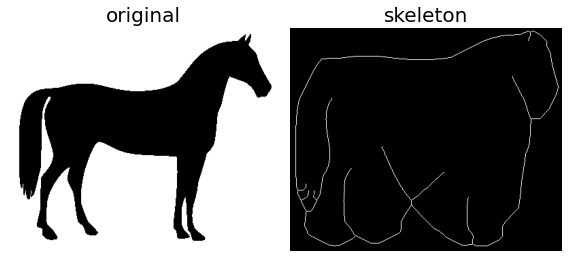

In [62]:
image = data.horse()

# perform skeletonization
thinned_image = thin(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(thinned_image, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

## Top-Hat Transform

La transformación Top-Hat es una operación que extrae pequeños elementos y detalles de imágenes dadas. Existen dos tipos de transformación Top-Hat: la transformación Top-Hat blanca se define como la diferencia entre la imagen de entrada y su apertura por algún elemento estructural, mientras que la transformación Top-Hat negra se define dualmente como la diferencia entre el cierre y  la imagen de entrada. 

Las transformaciones Top-Hat se utilizan para diversas tareas de procesamiento de imágenes, como extracción de características, ecualización de fondo, mejoras de imágenes y otras.

A continuación se muestra el resultado de realizar un Top-Hat white o Top-Hat tradicional, a una imágen de una galaxia.

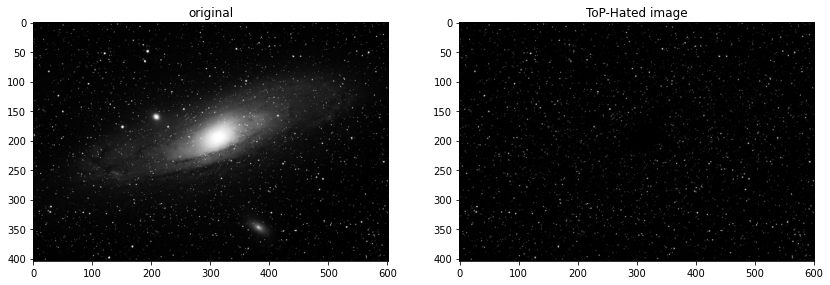

In [10]:
# Importing OpenCV 
import cv2
from helper_file import plot_images 
  
# Getting the kernel to be used in Top-Hat
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, 
                                   filterSize)
  
# Reading the image named 'input.jpg'
input_image = cv2.imread("../assets/testing2.png")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
  
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(input_image, 
                              cv2.MORPH_TOPHAT,
                              kernel)
  
plot_images(input_image, 'original', tophat_img, 'Top-Hated image')

Podemos ver que la imagen resultante no posee la restos de la galaxia que fue eliminada de la imágen mediante el procesamiento Top-Hat.

## Hit and Miss

La transformación Hit and Miss (o en español acertar y fallar) es una operación morfológica binaria que como otras operaciónes binarias toma como entrada una imagen binaria y un componente estructural y luego del procesamiento de dicha imagen devuelve otra imagen binaria como output.

Hit and Miss es usualmente denominado como la operación binaria morfológica basica ya que todas las otras operaciones binarias morfológicas pueden ser derivadas de ella.

Hit and miss se utiliza para buscar patrones particulares de píxeles de primer plano y de fondo en una imagen.

Hit and miss revisa si los pixeles del fondo y del frente de la imagen coinciden con los pixeles del componente estructural. De coincidir se reemplaza el pixel central por el color del frente y sino por el color del fondo.

Por ejemplo, el elemento estructural que se muestra en la Figura 5 se puede usar para encontrar puntos de esquina convexos en ángulo recto en las imágenes donde el mismo se aplique. 

<div align="center">
    <img src='Theory-Images/hit-miss-1.png' alt="elemento estructural" width="200">
      <h5 align="center">
          Figura 5: Elemento Estructural.
      </h5>
    <br>
</div>

Observe que en la figura 5, los píxeles del elemento tienen la forma de una esquina convexa inferior izquierda. Asumimos que el origen del elemento está en el centro del elemento 3 × 3. 

Para encontrar todas las esquinas en una imagen binaria, necesitamos ejecutar la transformación Hit and Miss cuatro veces con cuatro elementos diferentes que representan los cuatro tipos de esquinas en ángulo recto que se encuentran en las imágenes binarias. La figura 6 muestra los cuatro elementos diferentes utilizados en esta operación.

<div align="center">
    <img src='Theory-Images/hit-miss-2.png' alt="elementos estructurales" width="600">
      <h5 align="center">
          Figura 6: Elementos Estructurales.
      </h5>
    <br>
</div>

De esta manera podemos generar el resultado que se puede ver en la figura 7 en la imagen original luego de aplicar los elementos estructurales de la figura 6 mediante Hit and Miss.

<div align="center">
    <img src='Theory-Images/hit-miss-3.png' alt="elementos estructurales" width="600">
      <h5 align="center">
          Figura 
      </h5>
    <br>
</div>